## 导入包


In [3]:
# 基础的数据处理工具
import numpy as np
import pandas as pd

# 可视化
import matplotlib.pyplot as plt

# 处理python时间函数
import datetime

# 处理nc数据
import netCDF4 as nc
from netCDF4 import num2date

# 处理网格数据，shp之类的
import geopandas as gpd

# 处理tiff文件
import rasterio

# gis的一些逻辑判断
from shapely.geometry import Point

# 设置投影坐标系等
from cartopy import crs as ccrs

# 打印进度条
from tqdm import tqdm

tqdm.pandas()

# 并行

from joblib import Parallel, delayed

# 检测系统

import platform

# matplotlib 显示中文的问题
if platform.system() == 'Darwin':
    plt.rcParams["font.family"] = 'Arial Unicode MS'
elif platform.system() == 'Windows':
    plt.rcParams["font.family"] = 'SimHei'
else:
    pass

In [4]:
nc_data = nc.Dataset("./数据集/GIS实践3/2016_2020.nc")

In [5]:
for item in nc_data.variables.values():
    print('*' * 70)
    print(item)

**********************************************************************
<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of 9.969209968386869e+36 used
**********************************************************************
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (21,)
filling on, default _FillValue of 9.969209968386869e+36 used
**********************************************************************
<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (43848,)
filling on, default _FillValue of -2147483647 used
**********************************************************************
<class 'netCDF4._netCDF4.Variable'>
i

<ipython-input-5-831ad1beb57c>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(item)


In [6]:
nc_data.variables.keys()

dict_keys(['longitude', 'latitude', 'time', 'u10', 'v10'])

In [7]:
raw_latitude = np.array(nc_data.variables['latitude'])
raw_longitude = np.array(nc_data.variables['longitude'])
raw_time = np.array(nc_data.variables['time'])
raw_u10 = np.array(nc_data.variables['u10'])
raw_v10 = np.array(nc_data.variables['v10'])

missing_u10_value = nc_data.variables['u10'].missing_value
missing_v10_value = nc_data.variables['v10'].missing_value

<ipython-input-7-16fd3837c296>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_latitude = np.array(nc_data.variables['latitude'])
<ipython-input-7-16fd3837c296>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_longitude = np.array(nc_data.variables['longitude'])
<ipython-input-7-16fd3837c296>:3: DeprecationWarning: `np.bool` is a deprecate

In [8]:
raw_v10[raw_v10 == missing_v10_value] = np.nan
raw_u10[raw_u10 == missing_u10_value] = np.nan

## 绘制风场图


In [9]:
BIG_Longitude, BIG_LATITUDE = np.meshgrid(raw_longitude, raw_latitude)

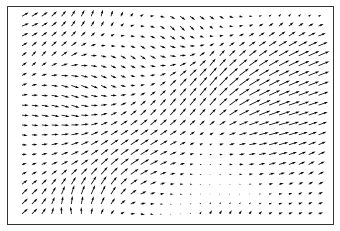

In [10]:
from cartopy import crs as ccrs
import cartopy.feature as cfeature

projection = ccrs.LambertConformal(central_longitude=np.mean(raw_longitude),
                                   central_latitude=np.mean(raw_latitude))

fig, ax = plt.subplots(subplot_kw={'projection': projection})

ax.quiver(BIG_Longitude, BIG_LATITUDE, raw_u10[0, :, :], raw_v10[0, :, :])
# ax.gridlines(draw_labels=True,linewidth=2, color='gray', alpha=0.5, linestyle='--')
# ax.add_feature(cfeature.LAND.with_scale('50m'))
# ax.add_feature(cfeature.COASTLINE.with_scale('50m'), lw=0.3)
# ax.add_feature(cfeature.OCEAN.with_scale('50m'))
# ax.streamplot(BIG_Longitude, BIG_LATITUDE, raw_u10[0, :, :], raw_v10[0, :, :])